# Identificador de Starfighters da Aliança Rebelde

# Autor
Nome: Kess Jhones Gomes Tavares  
Matrícula: 180124498  
Github: [KessJhones](https://github.com/kessJhones)  
# Objetivo
O objetivo deste artigo é o de criar um modelo capaz de diferenciar os três tipos de Starfighters da Aliança Rebelde, a partir de suas características, sendo elas: X-Wings, A-Wings and Y-Wings.

In [ ]:
%pip install -Uqq fastai
%pip install duckduckgo_search
%pip install -Uqq fastbook
%pip install timm

Utilizamos a fastdownload para realizar o download de imagens a partir do link. Temos uma para cada movimento.

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastbook import *
from fastai.vision.widgets import *

def search_images(term: str, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
from fastdownload import download_url
from fastai.vision.all import *

searches = 'X-Wings starfighters', 'A-Wings starfighters', 'Y-Wings starfighters'
path = Path('starfighters')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    resize_images(path/o, max_size=600, dest=path/o)

Searching for 'X-Wings starfighters'
Searching for 'A-Wings starfighters'
Searching for 'Y-Wings '


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

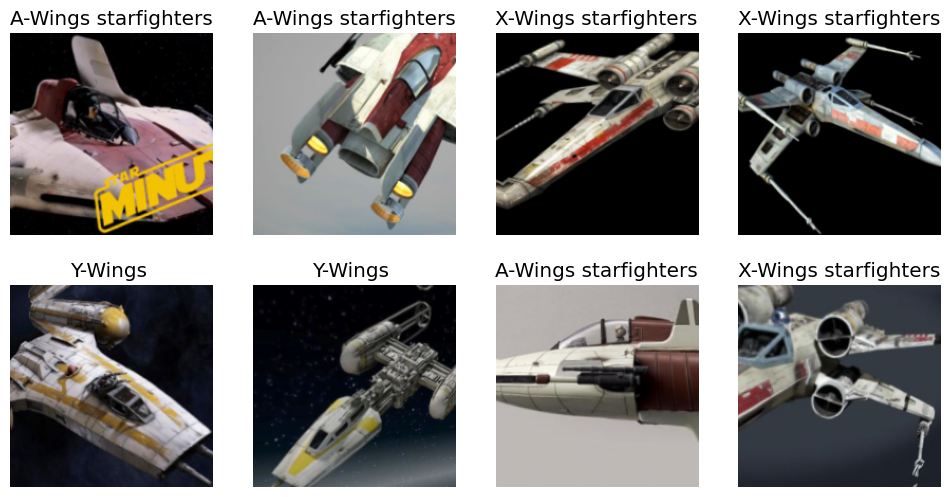

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(192, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dls.dataloaders(path)
dls.show_batch(max_n=8)

#Treinando Modelo

##Resnet 18  
ResNet 18 é a versão menor da ResNet e possui 18 camadas. É uma rede neural  mais leve e rápida, que pode ser treinada em conjuntos de dados menores. É adequada para aplicações onde a memória e o poder de processamento são limitados.


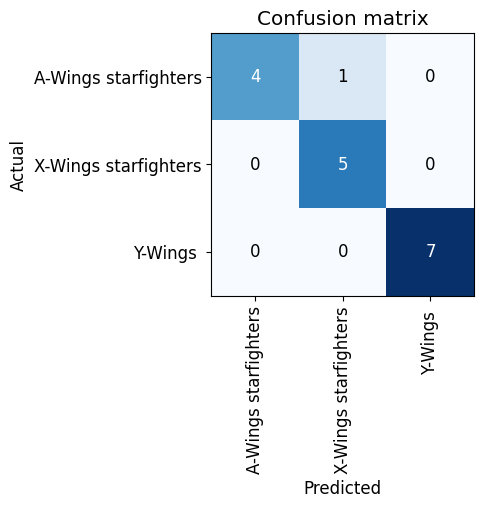

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

##Resnet34

ResNet 34 é uma versão intermediária da ResNet e possui 34 camadas. Essa arquitetura é mais profunda que a ResNet 18 e tem um desempenho ligeiramente melhor. É adequada para aplicações onde há mais recursos computacionais disponíveis.

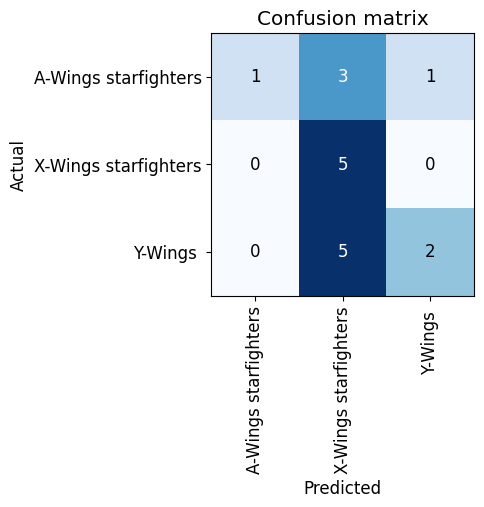

In [19]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)
matriz = ClassificationInterpretation.from_learner(learn)
matriz.plot_confusion_matrix(figsize=(5,5))

##ResNet 50
ResNet 50 é a versão maior e mais profunda da ResNet e possui 50 camadas. Essa arquitetura tem um desempenho ainda melhor e é frequentemente usada em aplicações que exigem alta precisão na classificação de imagens. É mais lenta e 
requer mais recursos computacionais do que as versões menores.

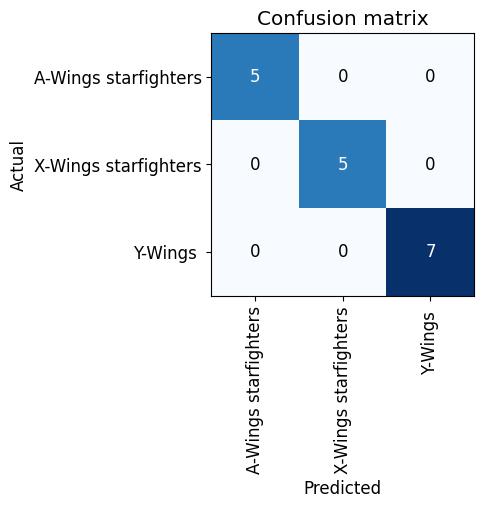

In [ ]:
learn = vision_learner(dls, resnet50, metrics = error_rate)
learn.fine_tune(5)
matriz = ClassificationInterpretation.from_learner(learn)
matriz.plot_confusion_matrix(figsize=(5,5))
     

#Conclusão

A resnet50 teve o melhor desempenho, porém é a rede que necessita de mais recursos, por isso é importante sempre ánalisar qual e testar qual rede melhor se encaixa a situação.